**Кто, откуда и куда. Короткое введение**

Данный файл сделан для ознакомления с библиотекой gym toolkit. Большая часть материала взята с сайта официальной документации и сопутствующих ему:

* Официальная документация https://gymnasium.farama.org/
* Сайт с примерами обучения на играх Atari https://ale.farama.org/environments/
* Документация с премерами на kaggle https://www.kaggle.com/code/utkarshsaxenadn/introduction-of-openai-gym



Gym — это библиотека для обучения с подкреплением, разработанная OpenAI в 2016 году. Она предоставляет широкий спектр сред, в которых исследователи и разработчики могут тестировать и сравнивать свои алгоритмы обучения с подкреплением. Эти среды охватывают различные задачи, такие как классические проблемы управления, физические задачи балансировки тележки и шеста, игры Atari или классического DOOM, симуляции робототехники и более сложные задачи.

Классический пример с тележкой.
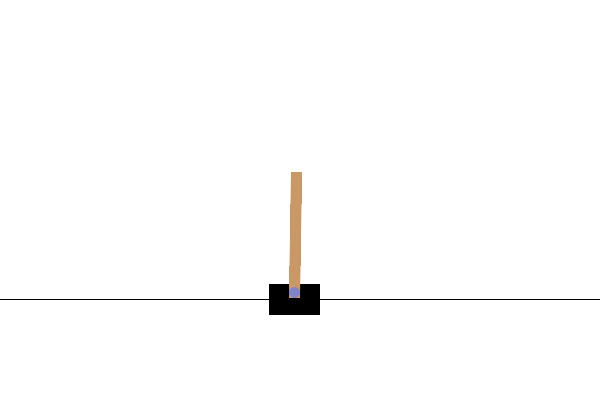

Один из классических примеров с маятником.
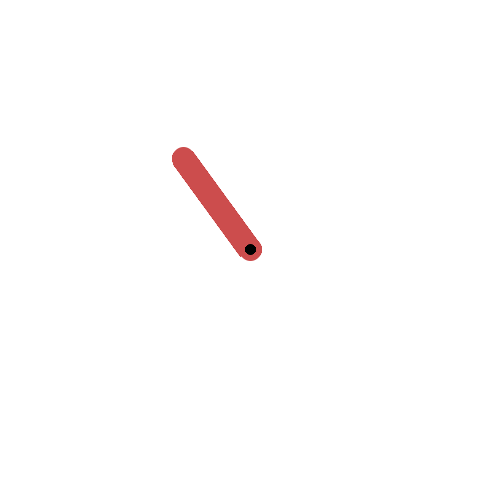

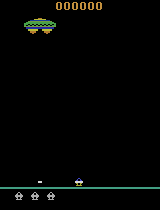

Пример с играми Atari.

В обучении с подкреплением классическая «петля агент–среда» представляет собой упрощённую модель взаимодействия между агентом и средой.
Агент получает наблюдение о текущем состоянии среды, затем выбирает действие. Это действие передаётся среде, которая в ответ определяет награду и формирует следующее наблюдение.
Этот цикл повторяется до тех пор, пока эпизод не завершится.

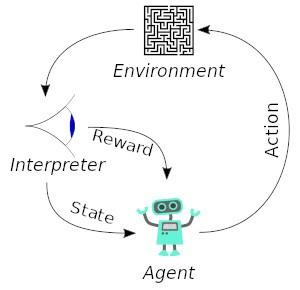

**Пример работы классических моделирований.**

В данном случае будем моделировать мягкое приземление корабля.
На первом шаге создаётся окружение
```
gym.make("Название_симуляции", render_mode="Вариант_визуализации")
```
Первым параметром передаём название той симуляции, которую хотим запустить. Будь то посадка шатла или наш классический маятник. Вторым параметром мы задаём то, как хотим видеть результат работы каждой итерации. Он может отображаться как видео, текст или картинка. Но обычно нет необходимости наблюдать за каждой итерацией, поэтому второй параметр можно не указывать. По умолчанию оно стоит *None*.

Далее запускаем/сбрасываем состояние нашей среды. Это позволит нам получить первичные данные.
```
observation, info = env.reset()
```
Получаем массив с текущем состоянием среды, а также словарь с дополнительными данными. Бывает, что он оказывается пустым, но такое допустимо.

Далее мы хотим сделать так, чтобы наш агент совершил какое-нибудь действие. Поскольку на данном этапе мы хотим только убедиться, что всё работает, то он сделает случайное действие.
```
action = env.action_space.sample()
```
Будет выбрано случайно одно из доступных действий. У нашего корабля это может быть:
*   Ничего не делать
*   Включить левый двигатель
*   Включить основной двигатель
*   Включить правый двигатель

После этого мы передаём наше действие в среду и считываем изменения.
```
observation, reward, terminated, truncated, info = env.step(action)
```
По очереди мы получили: новое состояние среды, награду за наши действия, разрушился ли корабль, прервано ли искусственно выполнение программы и до дополнительная информация.

По итогу мы выполняем эту процедуру до тех пор, пока корабль не разрушится или не преземлиться.

In [ ]:
!pip install gymnasium
!pip install "gymnasium[atari, accept-rom-license]"
!apt-get install -y swig
!pip install gymnasium[box2d]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (499 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

In [ ]:
import gymnasium as gym
import glob
import io
import base64
import imageio
from IPython.display import HTML, display
from gym.wrappers.monitoring.video_recorder import VideoRecorder

def show_video():
    mp4list = glob.glob('*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def train_and_record_video():
    env = gym.make("LunarLander-v3", render_mode="rgb_array")
    video_recorder = VideoRecorder(env, "video.mp4")
    observation, info = env.reset()
    episode_over = False
    for _ in range(5):
        while not episode_over:
            video_recorder.capture_frame()
            action = env.action_space.sample()
            observation, reward, terminated, truncated, info = env.step(action)
            episode_over = terminated or truncated
        observation, info = env.reset()
        episode_over = False
    video_recorder.close()
    env.close()
    show_video()
train_and_record_video()

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Чтобы обучить модель мягкому преземлению в обозначенном месте можно использовать различные алгоритмы. Например, DQN (Deep Q-Network), Q-learning, Policy Gradient методы или Actor-Critic. Есть хороший пример пример уже сделанной модели алгоритмом DQN по ссылке: https://colab.research.google.com/github/dhritishetty/LunarLander/blob/main/Deep%20Q-Learning%20for%20Lunar%20Landing.ipynb#scrollTo=O8CNwdOTcCoP

Гибкость библиотеки позволяет использовать её во множестве разных задач с поддержкой практически всех широко применяемых библиотек по машинному обучению. Ниже приведены ключевые плюсы.

**Поддержка различных алгоритмов обучения с подкреплением**

Gym позволяет легко интегрировать и тестировать разные алгоритмы обучения с подкреплением (RL). Помимо DQN, Q-learning, Policy Gradient, Actor-Critic, библиотека также поддерживает более сложные алгоритмы, такие как A3C (Asynchronous Advantage Actor-Critic), PPO (Proximal Policy Optimization), SAC (Soft Actor-Critic) и другие.

Можно интегрировать библиотеки, такие как Stable Baselines3 и Ray Rllib, которые предоставляют предобученные модели и удобные интерфейсы для разработки RL-агентов.

**Модификация среды через обёртки (Wrappers)**

Одним из мощных инструментов Gym является поддержка обёрток (wrappers), которые позволяют модифицировать поведение среды без изменения её исходного кода.

Примеры обёрток: TimeLimit (ограничение времени эпизода), RescaleAction (масштабирование действий), FlattenObservation (упрощение структуры наблюдений).

Использование обёрток позволяет добавлять дополнительные фичи или модификации в стандартную среду, например, можно добавлять шум или искажения в данные для создания более сложных задач для агентов.

**Интеграция с другими библиотеками**

Gym интегрируется с различными библиотеками для работы с нейросетями (например, TensorFlow, PyTorch). Это открывает широкие возможности для создания сложных агентов, использующих глубокое обучение.

Также есть интеграция с библиотеками для обучения на нескольких агентов (например, PettingZoo, RLLib), что позволяет работать с многозадачными средами и мультиагентным обучением.

**Безопасное обучение**

В дополнение к стандартным алгоритмам RL, в Gym также поддерживаются методы безопасного обучения, которые предназначены для того, чтобы агент не выполнял нежелательные или опасные действия. Это важный аспект при работе с реальными роботами или при решении задач, в которых агент должен соблюдать ограничения безопасности.

**Алгоритмические эвристики и повышение эффективности использования выборок**

Одной из самых важных задач в RL является улучшение эффективности использования выборок (sample efficiency). Агентам требуется огромное количество взаимодействий с окружающей средой для того, чтобы научиться оптимальному поведению. Существуют различные подходы и алгоритмические эвристики, направленные на уменьшение количества необходимых выборок. Одним из таких методов является использование более эффективных стратегий обучения, например, алгоритмов Off-Policy (DQN, SAC), которые позволяют использовать данные из предыдущих шагов для обучения, что сокращает количество новых взаимодействий, необходимых для обучения. Кроме того, исследователи активно разрабатывают новые методы, которые уменьшают зависимость от большого количества данных, что приводит к более быстрым и точным моделям.

**Ускорение обучения в RL**

Процесс обучения агентов в задачах с подкреплением может быть довольно медленным и ресурсоёмким, особенно в сложных средах, требующих огромного количества данных и вычислений. Для повышения эффективности и ускорения обучения применяются несколько стратегий, которые помогают значительно уменьшить время, необходимое для тренировки моделей. Вот три основных подхода для оптимизации этого процесса:

**Векторизация среды**

Одним из самых эффективных методов ускорения обучения является векторизация среды. В традиционном подходе агент взаимодействует с одним экземпляром среды, что ограничивает количество шагов, которые агент может сделать за одну итерацию. Векторизация среды позволяет запускать несколько экземпляров одной и той же среды параллельно, тем самым увеличивая количество шагов и выборок, которые агент может использовать за единицу времени. Для этого в Gymnasium существуют два класса — SyncVectorEnv и AsyncVectorEnv, которые позволяют реализовать синхронную и асинхронную векторизацию среды. Этот подход значительно увеличивает скорость тренировки, однако важно отметить, что для очень большого числа под-сред может потребоваться адаптация алгоритмов обучения, а также возможна нестабильность тренировки из-за большого объема данных.

In [ ]:
import gymnasium as gym
import numpy as np
import time

num_envs = 3
num_episodes = 15

# --- СИНХРОННАЯ ВЕКТОРИЗАЦИЯ  ---
envs = gym.make_vec("CartPole-v1", num_envs=num_envs)

start_time = time.time()

for episode in range(num_episodes):
    if episode % 5 == 0:
        print("Синхронно — эпизод", episode)
    observations, infos = envs.reset()
    dones = np.array([False] * num_envs)

    while not np.all(dones):
        actions = np.random.randint(0, envs.single_action_space.n, size=num_envs)
        observations, rewards, terminated, truncated, infos = envs.step(actions)
        dones = np.logical_or(terminated, truncated)

end_time = time.time()
envs.close()
print(f"Время выполнения (векторизация Sync): {end_time - start_time:.3f} сек\n")


# --- АСИНХРОННАЯ ВЕКТОРИЗАЦИЯ ---
def make_env():
    def thunk():
        return gym.make("CartPole-v1")
    return thunk

from gymnasium.vector import AsyncVectorEnv
async_envs = AsyncVectorEnv([make_env() for _ in range(num_envs)])

start_time = time.time()

for episode in range(num_episodes):
    if episode % 5 == 0:
        print("Асинхронно — эпизод", episode)
    observations, infos = async_envs.reset()
    dones = np.array([False] * num_envs)

    while not np.all(dones):
        actions = np.random.randint(0, async_envs.single_action_space.n, size=num_envs)
        observations, rewards, terminated, truncated, infos = async_envs.step(actions)
        dones = np.logical_or(terminated, truncated)

end_time = time.time()
async_envs.close()
print(f"Время выполнения (векторизация Async): {end_time - start_time:.3f} сек\n")


# --- ПОСЛЕДОВАТЕЛЬНО ---
envs_seq = [gym.make("CartPole-v1") for _ in range(num_envs)]

start_time = time.time()

for episode in range(num_episodes):
    if episode % 5 == 0:
        print("Последовательно — эпизод", episode)
    for env in envs_seq:
        obs, info = env.reset()
        done = False
        while not done:
            action = env.action_space.sample()
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

end_time = time.time()

for env in envs_seq:
    env.close()

print(f"Время выполнения (последовательно): {end_time - start_time:.3f} сек")


Синхронно — эпизод 0
Синхронно — эпизод 5
Синхронно — эпизод 10
Время выполнения (векторизация Sync): 39.325 сек

Асинхронно — эпизод 0
Асинхронно — эпизод 5
Асинхронно — эпизод 10
Время выполнения (векторизация Async): 122.763 сек

Последовательно — эпизод 0
Последовательно — эпизод 5
Последовательно — эпизод 10
Время выполнения (последовательно): 0.021 сек


**Оптимизация процесса обучения**

Ускорение тренировки можно достичь через оптимизацию кода. Особенно это актуально для задач, использующих глубокое обучение, когда вычисления могут происходить на GPU. Для этого в таких библиотеках, как PyTorch и JAX, предусмотрена возможность применения JIT-компиляции (Just-In-Time). JIT-компиляция позволяет оптимизировать выполнение кода и эффективно распределять вычисления между центральным процессором (CPU) и графическим процессором (GPU), что ускоряет обучение. Эта оптимизация критична для глубоких моделей, поскольку значительно снижает время на обработку данных и обновление весов сети.

In [ ]:
import gymnasium as gym
import jax
import jax.numpy as jnp
from jax import grad, jit
import numpy as np
import time

def model(w, x):
    return jnp.dot(x, w)

def loss_fn(w, obs, action, reward):
    predicted = model(w, obs)
    loss = (predicted - action) ** 2
    return loss.sum()

num_episodes = 100
learning_rate = 0.01

grad_fn = grad(loss_fn)
jit_grad_fn = jit(grad_fn, static_argnums=(2, 3))
env = gym.make('CartPole-v1')
w = jnp.zeros(env.observation_space.shape[0])
start_time = time.time()

for episode in range(num_episodes):
    obs, _ = env.reset()
    obs = jnp.array(obs)
    action = np.random.choice(env.action_space.n)
    reward = 0
    gradients = jit_grad_fn(w, obs, action, reward)
    w -= learning_rate * gradients

end_time = time.time()
env.close()

print(f"Время выполнения с JIT: {end_time - start_time:.3f} сек")


Время выполнения с JIT: 0.162 сек
